In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
file_path = '/Users/mindstix/Downloads/F1_test (2).csv'  # Replace with your actual CSV file path
data = pd.read_csv(file_path)

# # Convert FECHAPROCESO to datetime
# data['FECHAPROCESO'] = pd.to_datetime(data['purchase_date'])

# # Filter the first 500 rows
# # data = data.head()

# # Calculate Recency
# latest_date = data['FECHAPROCESO'].max()
# data['Recency'] = 1 / ((latest_date - data['FECHAPROCESO']).dt.days + 1)

# Scale Recency to range [1, 10]
min_recency = data['recency'].min()
max_recency = data['recency'].max()
# Adjust normalization to stretch the range
data['Recency'] = 1 + 9 * (data['recency'] - min_recency) / ((max_recency - min_recency))

# # Calculate Frequency by consultant and product
# frequency = data.groupby(['consultant_id', 'product_id']).size().reset_index(name='Frequency')

# # Aggregate Frequency at the consultant level
# frequency = frequency.groupby('consultant_id')['Frequency'].sum().reset_index()

# Scale Frequency to range [1, 10]
min_frequency = data['purchase_frequency'].min()
max_frequency = data['purchase_frequency'].max()
data['Frequency'] = 1 + 9 * (data['purchase_frequency'] - min_frequency) / (max_frequency - min_frequency)

# Merge Frequency and Recency
recency = data.groupby('consultant_id')['recency'].min().reset_index()
# rf_data = pd.merge(data['Frequency'], recency, on='consultant_id')
# print(data.head(2))
rf_data = data

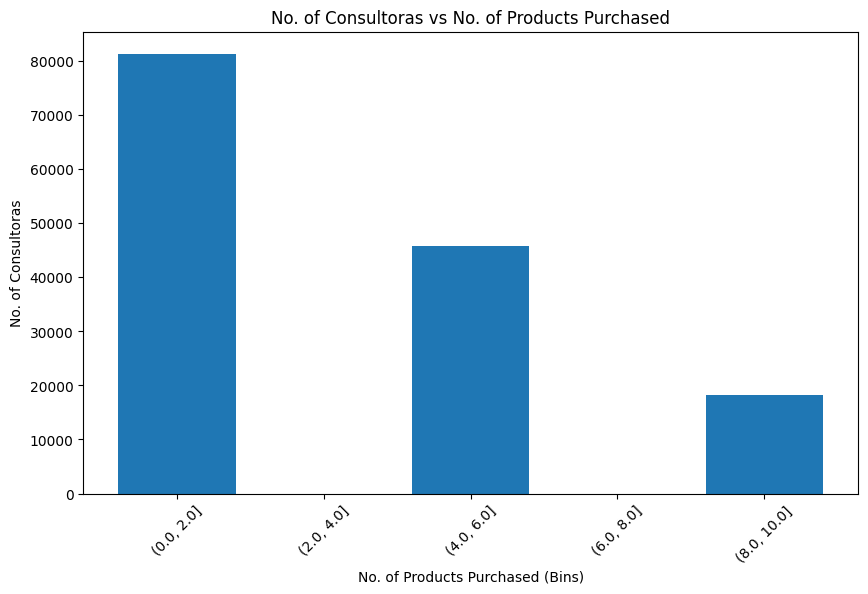

In [61]:
# ---- Plot 1: No. of Consultoras vs No. of Products Purchased ----
bins_products = np.arange(0, rf_data['Frequency'].max() + 1, 2)
rf_data['Frequency_bins'] = pd.cut(rf_data['Frequency'], bins=bins_products)
frequency_distribution = rf_data['Frequency_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index.astype(str), frequency_distribution.values)
plt.title('No. of Consultoras vs No. of Products Purchased')
plt.xlabel('No. of Products Purchased (Bins)')
plt.ylabel('No. of Consultoras')
plt.xticks(rotation=45)
plt.show()

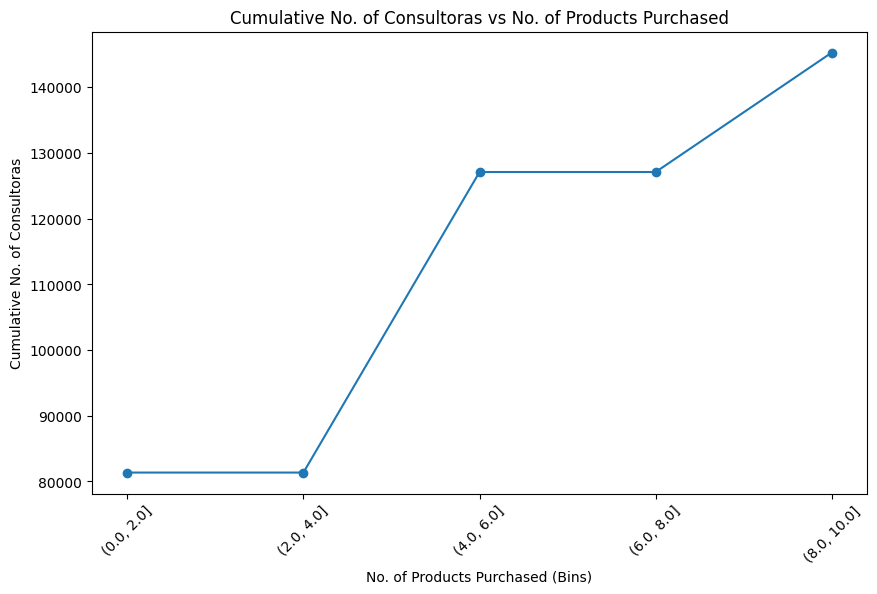

In [62]:
# ---- Plot 2: Cumulative Graph ----
cumulative_data = frequency_distribution.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_data.index.astype(str), cumulative_data.values, marker='o')
plt.title('Cumulative No. of Consultoras vs No. of Products Purchased')
plt.xlabel('No. of Products Purchased (Bins)')
plt.ylabel('Cumulative No. of Consultoras')
plt.xticks(rotation=45)
plt.show()

In [63]:
print(rf_data['Recency'].describe())
print(rf_data['Frequency'].describe())


count    145270.000000
mean          1.285100
std           0.551634
min           1.000000
25%           1.085166
50%           1.105776
75%           1.251125
max          10.000000
Name: Recency, dtype: float64
count    145270.000000
mean          3.552148
std           3.174277
min           1.000000
25%           1.000000
50%           1.001980
75%           5.508415
max          10.000000
Name: Frequency, dtype: float64


/var/folders/sb/j494kvb16_b2rj750v6fp59c0000gn/T/ipykernel_54563/1651676615.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = rf_data.pivot_table(values='Combined_Score',


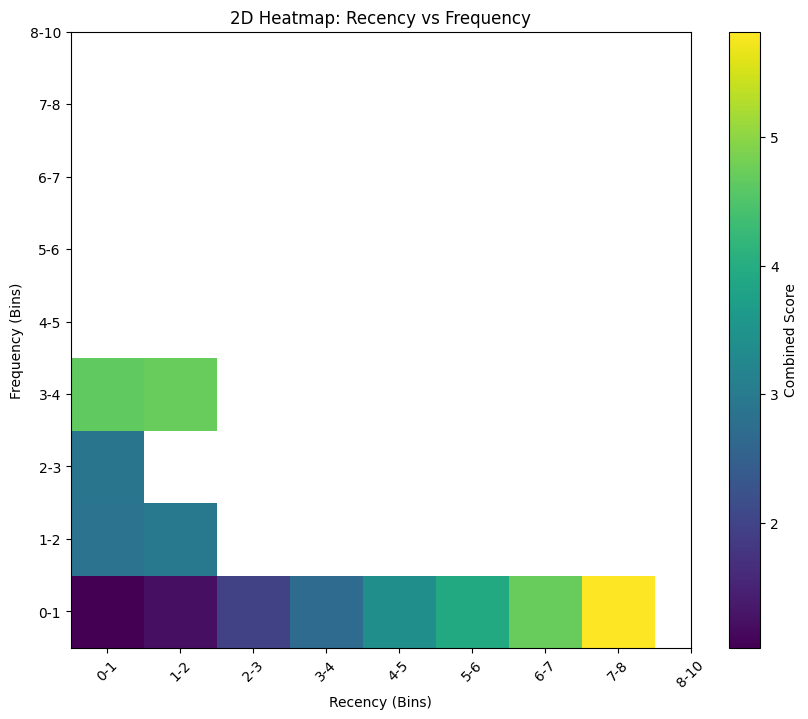

In [64]:
# Assuming `rf_data` is already prepared and bins have been created
alpha, beta = 0.4, 0.6
rf_data['Combined_Score'] = alpha * rf_data['Frequency'] + beta * rf_data['Recency']

# Handle potential issues with max values
bins_recency = np.linspace(0, max(1, rf_data['Recency'].max()), 10)
bins_frequency = np.linspace(0, max(1, rf_data['Frequency'].max()), 10)

rf_data['Recency_bins'] = pd.cut(rf_data['Recency'], bins=bins_recency)
rf_data['Frequency_bins'] = pd.cut(rf_data['Frequency'], bins=bins_frequency)

heatmap_data = rf_data.pivot_table(values='Combined_Score', 
                                   index='Frequency_bins', 
                                   columns='Recency_bins', 
                                   aggfunc='mean')

# Generate labels for bins
recency_labels = [f"{int(bin.left)}-{int(bin.right)}" for bin in heatmap_data.columns.categories]
frequency_labels = [f"{int(bin.left)}-{int(bin.right)}" for bin in heatmap_data.index.categories]

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Combined Score')
plt.title('2D Heatmap: Recency vs Frequency')

# Proper axis labels
plt.xlabel('Recency (Bins)')
plt.ylabel('Frequency (Bins)')
plt.xticks(range(len(recency_labels)), recency_labels, rotation=45)
plt.yticks(range(len(frequency_labels)), frequency_labels)

plt.show()


/var/folders/sb/j494kvb16_b2rj750v6fp59c0000gn/T/ipykernel_54563/4078293203.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = rf_data.pivot_table(values='Combined_Score',


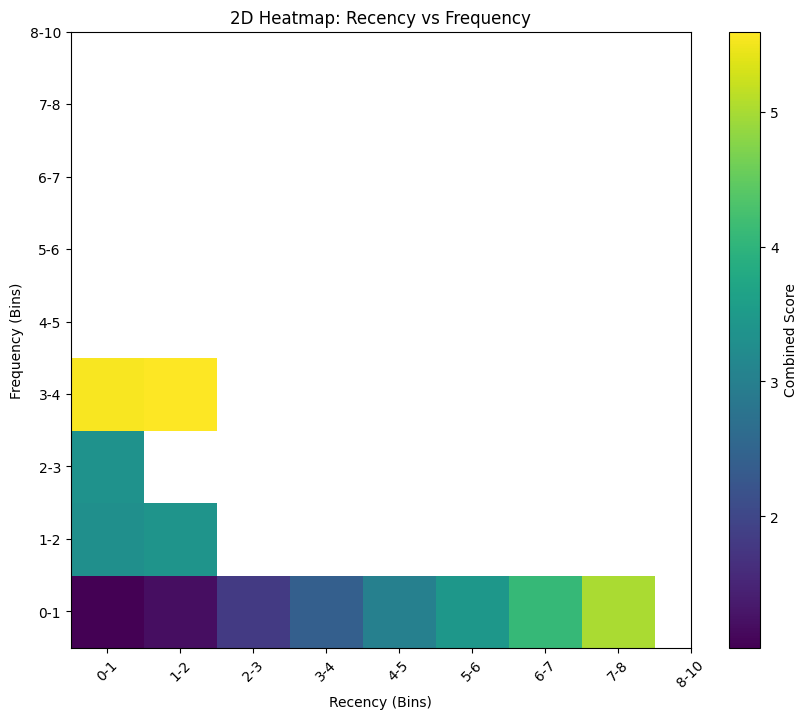

In [65]:
# Assuming `rf_data` is already prepared and bins have been created
alpha, beta = 0.5, 0.5
rf_data['Combined_Score'] = alpha * rf_data['Frequency'] + beta * rf_data['Recency']

# Handle potential issues with max values
bins_recency = np.linspace(0, max(1, rf_data['Recency'].max()), 10)
bins_frequency = np.linspace(0, max(1, rf_data['Frequency'].max()), 10)

rf_data['Recency_bins'] = pd.cut(rf_data['Recency'], bins=bins_recency)
rf_data['Frequency_bins'] = pd.cut(rf_data['Frequency'], bins=bins_frequency)

heatmap_data = rf_data.pivot_table(values='Combined_Score', 
                                   index='Frequency_bins', 
                                   columns='Recency_bins', 
                                   aggfunc='mean')

# Generate labels for bins
recency_labels = [f"{int(bin.left)}-{int(bin.right)}" for bin in heatmap_data.columns.categories]
frequency_labels = [f"{int(bin.left)}-{int(bin.right)}" for bin in heatmap_data.index.categories]

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Combined Score')
plt.title('2D Heatmap: Recency vs Frequency')

# Proper axis labels
plt.xlabel('Recency (Bins)')
plt.ylabel('Frequency (Bins)')
plt.xticks(range(len(recency_labels)), recency_labels, rotation=45)
plt.yticks(range(len(frequency_labels)), frequency_labels)

plt.show()


/var/folders/sb/j494kvb16_b2rj750v6fp59c0000gn/T/ipykernel_54563/1748802047.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = rf_data.pivot_table(values='Combined_Score',


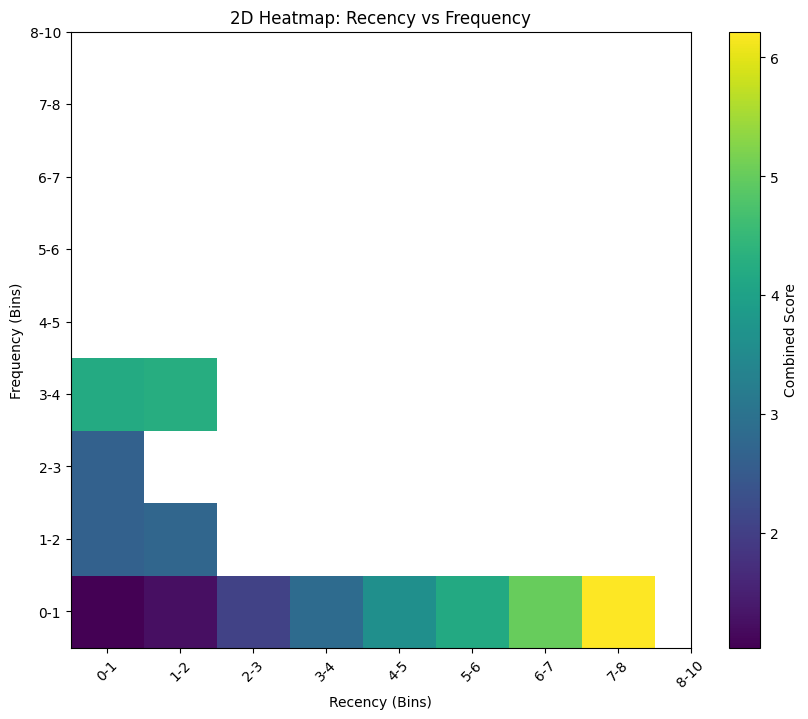

In [66]:
# Assuming `rf_data` is already prepared and bins have been created
alpha, beta = 0.35, 0.65
rf_data['Combined_Score'] = alpha * rf_data['Frequency'] + beta * rf_data['Recency']

# Handle potential issues with max values
bins_recency = np.linspace(0, max(1, rf_data['Recency'].max()), 10)
bins_frequency = np.linspace(0, max(1, rf_data['Frequency'].max()), 10)

rf_data['Recency_bins'] = pd.cut(rf_data['Recency'], bins=bins_recency)
rf_data['Frequency_bins'] = pd.cut(rf_data['Frequency'], bins=bins_frequency)

heatmap_data = rf_data.pivot_table(values='Combined_Score', 
                                   index='Frequency_bins', 
                                   columns='Recency_bins', 
                                   aggfunc='mean')

# Generate labels for bins
recency_labels = [f"{int(bin.left)}-{int(bin.right)}" for bin in heatmap_data.columns.categories]
frequency_labels = [f"{int(bin.left)}-{int(bin.right)}" for bin in heatmap_data.index.categories]

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Combined Score')
plt.title('2D Heatmap: Recency vs Frequency')

# Proper axis labels
plt.xlabel('Recency (Bins)')
plt.ylabel('Frequency (Bins)')
plt.xticks(range(len(recency_labels)), recency_labels, rotation=45)
plt.yticks(range(len(frequency_labels)), frequency_labels)

plt.show()


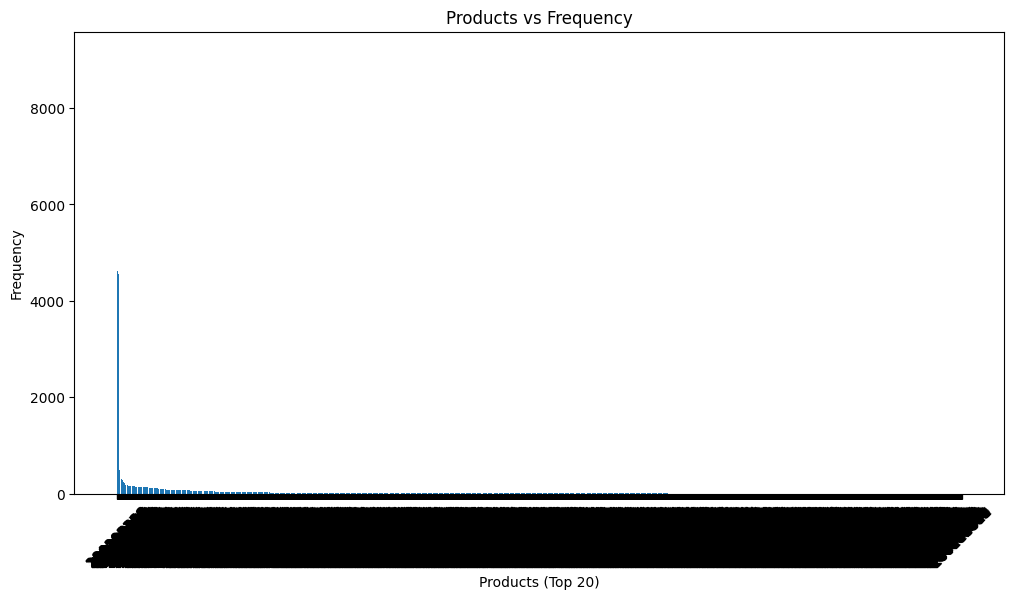

In [50]:
# ---- Plot 4: Products vs Frequency ----
product_frequency = data['product_id'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(product_frequency.index.astype(str), product_frequency.values)  # Top 20 products for clarity
plt.title('Products vs Frequency')
plt.xlabel('Products (Top 20)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

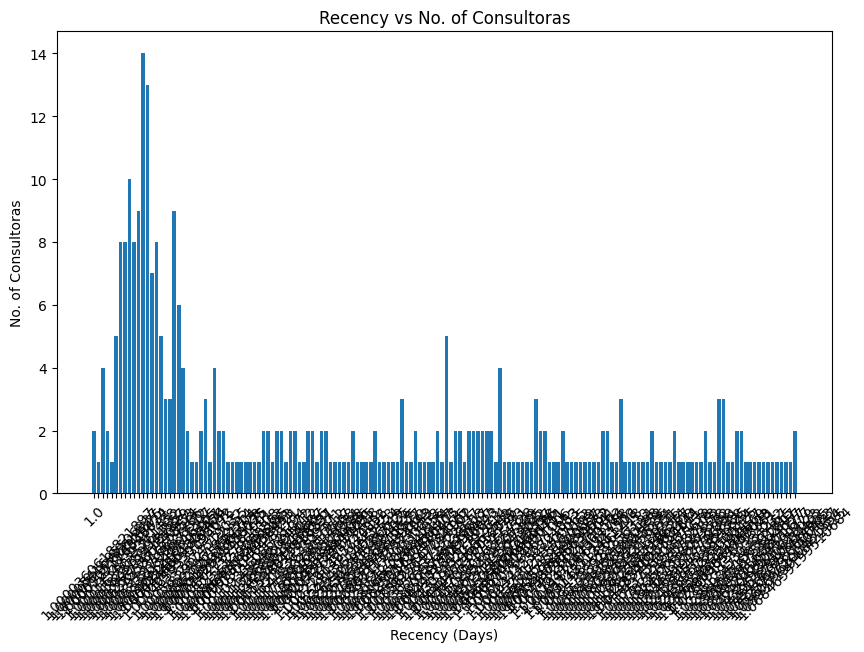

In [51]:

# ---- Plot 5: Recency vs No. of Consultoras ----
recency_distribution = rf_data['Recency'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(recency_distribution.index.astype(str), recency_distribution.values)
plt.title('Recency vs No. of Consultoras')
plt.xlabel('Recency (Days)')
plt.ylabel('No. of Consultoras')
plt.xticks(rotation=45)
plt.show()

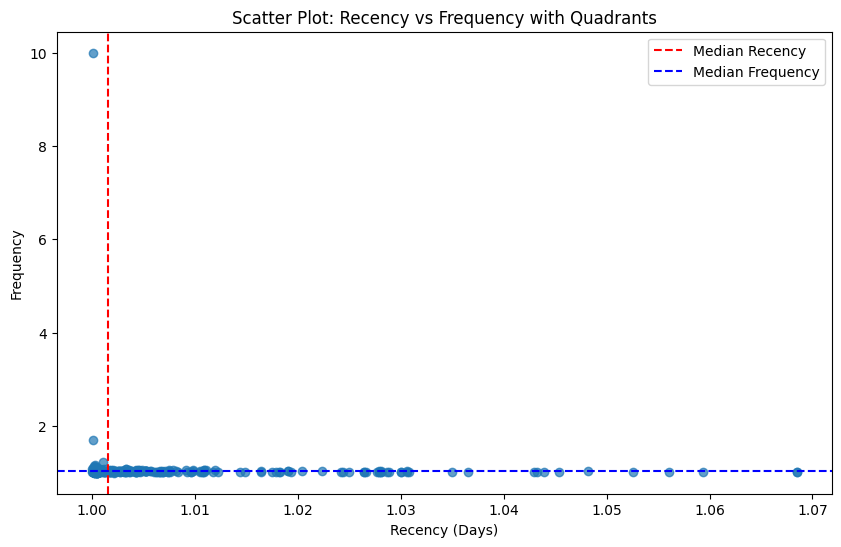

In [52]:
# ---- Plot 6: Scatter Plot with Quadrants ----
median_recency = rf_data['Recency'].median()
median_frequency = rf_data['Frequency'].median()

plt.figure(figsize=(10, 6))
plt.scatter(rf_data['Recency'], rf_data['Frequency'], alpha=0.7)
plt.axvline(median_recency, color='red', linestyle='--', label='Median Recency')
plt.axhline(median_frequency, color='blue', linestyle='--', label='Median Frequency')
plt.title('Scatter Plot: Recency vs Frequency with Quadrants')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()
